In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

# reading the data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# getting their shapes
print("Shape of train :", train.shape)
print("Shape of test :", test.shape)

Shape of train : (54808, 14)
Shape of test : (23490, 13)


In [ ]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [ ]:
train.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


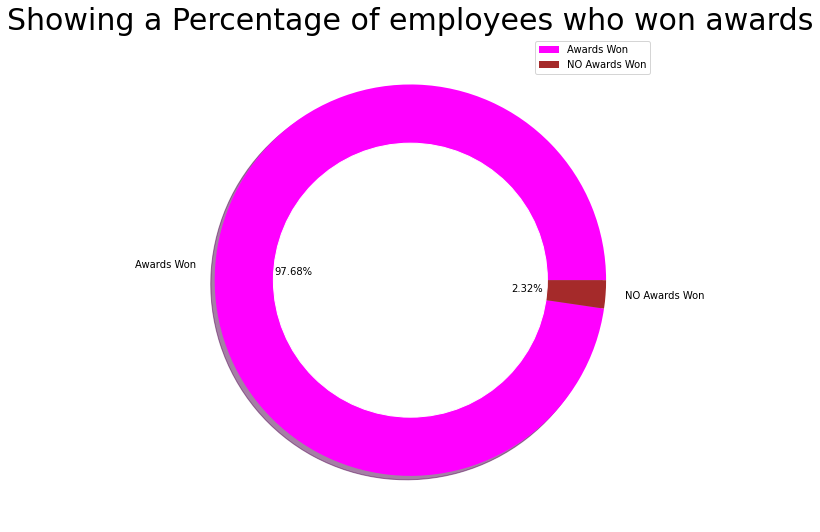

In [ ]:

# plotting a donut chart for visualizing each of the recruitment channel's share

size = [53538, 1270]
colors = ['magenta', 'brown']
labels = "Awards Won", "NO Awards Won"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing a Percentage of employees who won awards', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [ ]:

# filling missing values

train['education'].fillna(train['education'].mode()[0], inplace = True)
train['previous_year_rating'].fillna(1, inplace = True)

# again checking if there is any Null value left in the data
train.isnull().sum().sum()

0

In [ ]:
# removing the employee_id column

train = train.drop(['employee_id'], axis = 1)

train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [ ]:

# filling missing values

test['education'].fillna(test['education'].mode()[0], inplace = True)
test['previous_year_rating'].fillna(1, inplace = True)

# again checking if there is any Null value left in the data
test.isnull().sum().sum()

0

In [ ]:
# saving the employee_id

emp_id = test['employee_id']

# removing the employee_id column

test = test.drop(['employee_id'], axis = 1)

test.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [ ]:
# defining the test set

x_test = test

x_test.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [ ]:

# one hot encoding for the test set

x_test = pd.get_dummies(x_test)

x_test.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

In [ ]:
# splitting the train set into dependent and independent sets

x = train.iloc[:, :-1]
y = train.iloc[:, -1]

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (54808, 12)
Shape of y: (54808,)


In [ ]:
# one hot encoding for the train set

x = pd.get_dummies(x)

x.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

In [ ]:
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_sample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Size of x-sample : (100280, 58)
Size of y-sample : (100280, 1)


In [ ]:
# splitting x and y into train and validation sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_sample, y_sample, test_size = 0.2, random_state = 0)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_valid.shape)

Shape of x_train:  (80224, 58)
Shape of x_valid:  (20056, 58)
Shape of y_train:  (80224, 1)
Shape of y_valid:  (20056, 1)


In [ ]:
ss = pd.read_csv("sample_submission.csv")
ss.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [ ]:

# standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_sample = sc.fit_transform(x_sample)
x_test  = sc.transform(x_test)
#x_valid = sc.transform(x_valid)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

rfc = RandomForestClassifier()
rfc.fit(x_sample, y_sample)
rfc_predt = rfc.predict(x_sample)

rfc_pred = rfc.predict(x_test)
f1_score(y_sample, rfc_predt)
#print("Training Accuracy :", rfc.score(x_sample, y_sample))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.9998504143522444

In [ ]:
ss['is_promoted'] = rfc_pred
ss['is_promoted'].value_counts()

0    22759
1      731
Name: is_promoted, dtype: int64

In [ ]:
f1_score()

In [ ]:
ss.to_csv("2RFC1.csv", index=False)

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

xgb = XGBClassifier()
xgb.fit(x_sample, y_sample)
xgb_predt = xgb.predict(x_sample)

xgb_pred = xgb.predict(x_test)
f1_score(y_sample, xgb_predt)

#print("Training Accuracy :", xgb.score(x_train, y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9476470221908537

In [ ]:
ss['is_promoted'] = xgb_pred
ss['is_promoted'].value_counts()

0    22734
1      756
Name: is_promoted, dtype: int64

In [ ]:
ss.to_csv("2XGB1.csv", index=False)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

lgb = LGBMClassifier()
lgb.fit(x_sample, y_sample)
lgb_predt = lgb.predict(x_sample)
f1_score(y_sample, lgb_predt)
lgb_pred = lgb.predict(x_test)

#print("Training Accuracy :", lgb.score(x_train, y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
ss['is_promoted'] = lgb_pred
ss['is_promoted'].value_counts()

0    22780
1      710
Name: is_promoted, dtype: int64

In [ ]:
ss.to_csv("2LGB1.csv", index=False)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(x_sample, y_sample)
etc_predt = etc.predict(x_sample)
f1_score(y_sample, xgb_predt)
etc_pred = etc.predict(x_test)

#print("Training Accuracy :", etc.score(x_train, y_train))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
ss['is_promoted'] = etc_pred
ss['is_promoted'].value_counts()

0    22423
1     1067
Name: is_promoted, dtype: int64

In [ ]:
ss.to_csv("2ETC1.csv", index=False)

In [ ]:
pip install catboost

     |████████████████████████████████| 64.8MB 61kB/s 


In [ ]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(learning_rate = 0.004, early_stopping_rounds = 100)
cbc.fit(x_sample, y_sample)
cbc_predt = cbc.predict(x_sample)

cbc_pred = cbc.predict(x_test)
f1_score(y_sample,cbc_predt)
#print("Training Accuracy :", rfc.score(x_train, y_train))

0:	learn: 0.6886293	total: 93.8ms	remaining: 1m 33s
1:	learn: 0.6840924	total: 174ms	remaining: 1m 26s
2:	learn: 0.6796023	total: 253ms	remaining: 1m 24s
3:	learn: 0.6753314	total: 333ms	remaining: 1m 23s
4:	learn: 0.6710266	total: 416ms	remaining: 1m 22s
5:	learn: 0.6672059	total: 501ms	remaining: 1m 23s
6:	learn: 0.6628518	total: 581ms	remaining: 1m 22s
7:	learn: 0.6585099	total: 659ms	remaining: 1m 21s
8:	learn: 0.6546496	total: 736ms	remaining: 1m 21s
9:	learn: 0.6507084	total: 816ms	remaining: 1m 20s
10:	learn: 0.6467971	total: 896ms	remaining: 1m 20s
11:	learn: 0.6425120	total: 975ms	remaining: 1m 20s
12:	learn: 0.6387076	total: 1.06s	remaining: 1m 20s
13:	learn: 0.6350499	total: 1.14s	remaining: 1m 20s
14:	learn: 0.6312344	total: 1.22s	remaining: 1m 19s
15:	learn: 0.6277039	total: 1.29s	remaining: 1m 19s
16:	learn: 0.6238859	total: 1.37s	remaining: 1m 19s
17:	learn: 0.6201258	total: 1.48s	remaining: 1m 20s
18:	learn: 0.6161956	total: 1.57s	remaining: 1m 20s
19:	learn: 0.6125683	

0.9538653496230829

In [ ]:
ss['is_promoted'] = cbc_pred
ss['is_promoted'].value_counts()

0    22907
1      583
Name: is_promoted, dtype: int64

In [ ]:
ss.to_csv("2CBC1.csv", index=False)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)


classifier.fit(x_sample, y_sample)
nb_pred = classifier.predict(x_sample)
f1_scr = f1_score(y_sample, nb_pred)
f1_scr

0.999860371412044

In [ ]:
dc_pred = classifier.predict(x_test)
ss['is_promoted'] = dc_pred
ss['is_promoted'].value_counts()

0    21392
1     2098
Name: is_promoted, dtype: int64

In [ ]:
ss.to_csv("2DC1.csv", index=False)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_sample, y_sample)
lg_pred = logreg.predict(x_sample)
f1_scr = f1_score(y_sample, lg_pred)
f1_scr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8104783115918974

In [ ]:
lgr_pred = logreg.predict(x_test)
ss['is_promoted'] = lgr_pred
ss['is_promoted'].value_counts()

0    16873
1     6617
Name: is_promoted, dtype: int64

In [ ]:
ss.to_csv("2LGR1.csv", index=False)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(x_sample, y_sample)
ada_pred = model.predict(x_sample)
f1_scr = f1_score(y_sample,ada_pred)
f1_scr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8975685515182686

In [ ]:
adab_pred = model.predict(x_test)
ss['is_promoted'] = adab_pred
ss['is_promoted'].value_counts()

0    20863
1     2627
Name: is_promoted, dtype: int64

In [ ]:
ss.to_csv("2ADAB1.csv", index=False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)
classifier.fit(x_sample, y_sample)
knn_pred = classifier.predict(x_sample)
f1_scr = f1_score(y_sample,knn_pred)
f1_scr

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9583885812339131

In [ ]:
knnc_pred = classifier.predict(x_test)
ss['is_promoted'] = knnc_pred
ss['is_promoted'].value_counts()

0    20609
1     2881
Name: is_promoted, dtype: int64

In [ ]:
ss.to_csv("2KNNC1.csv", index=False)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_sample, y_sample)
svm_pred = classifier.predict(x_sample)
f1_scr = f1_score(y_sample, svm_pred)
f1_scr

In [ ]:
svmc_pred = classifier.predict(x_test)
ss['is_promoted'] = svmc_pred
ss['is_promoted'].value_counts()

In [ ]:
ss.to_csv("2SVM1.csv", index=False)

In [ ]:
boosted_predictions = rfc_pred*0.2 + xgb_pred*0.2 + lgb_pred*0.4 + etc_pred*0.3

In [ ]:
ss['is_promoted'] = boosted_predictions
ss['is_promoted'].value_counts()

0.0    21830
1.1      377
0.2      365
0.3      317
0.5      222
0.4      119
0.9      111
0.7       93
0.6       36
0.8       20
Name: is_promoted, dtype: int64

In [ ]:
for i in range(0,ss.shape[0]):
  if ss['is_promoted'][i]>0.5:
    ss['is_promoted'][i] = 1
  else:
    ss['is_promoted'][i] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
ss['is_promoted'].value_counts()

0.0    22853
1.0      637
Name: is_promoted, dtype: int64

In [ ]:
ss['is_promoted'] = ss['is_promoted'].astype(int)

In [ ]:
ss['is_promoted']

0        0
1        0
2        0
3        0
4        0
        ..
23485    0
23486    0
23487    0
23488    0
23489    1
Name: is_promoted, Length: 23490, dtype: int64

In [ ]:
ss.to_csv("boostpred.csv", index=False)